# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [63]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact

import warnings
warnings.filterwarnings('ignore')

In [64]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

## Load Data

In [96]:
# Read the census data into a Pandas DataFrame
file_path = Path("./Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head(5)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [100]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_data_mean_of_all_columns = sfo_data.groupby(["year"]).mean()
sfo_data_housingunits = sfo_data_mean_of_all_columns.drop(['sale_price_sqr_foot', 'gross_rent'],axis=1)
sfo_data_housingunits.rename(columns={"housing_units": "Mean of housing units"}, inplace=True)
print(sfo_data_housingunits)

max_units = sfo_data_housingunits["Mean of housing units"].max()
min_units = sfo_data_housingunits["Mean of housing units"].min()
std_dev_units = sfo_data_housingunits["Mean of housing units"].std()
#print(max_units)
#print(min_units)
#print(std_dev_units)

      Mean of housing units
year                       
2010                 372560
2011                 374507
2012                 376454
2013                 378401
2014                 380348
2015                 382295
2016                 384242


In [99]:
# Save the dataframe as a csv file
sfo_data_housingunits.to_csv (r'.\export_dataframe7.csv', index = True, header=True)

[Text(0, 0.5, 'Housing Units'), Text(0.5, 0, 'Year')]

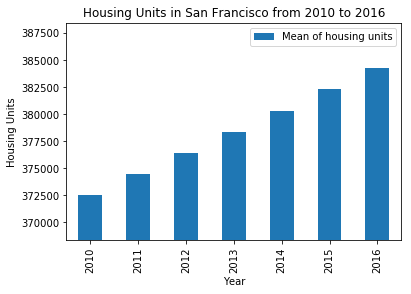

In [177]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

axis_plot =  sfo_data_housingunits.plot.bar(
    ylim = (min_units-std_dev_units, max_units+std_dev_units), 
    title="Housing Units in San Francisco from 2010 to 2016"
    )
axis_plot.set(ylabel="Housing Units", xlabel="Year")

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [105]:
# Calculate the average sale price per square foot and average gross rent

average_sp_gr_peryear_df = sfo_data[['sale_price_sqr_foot', 'gross_rent']].groupby('year').mean()
average_sp_gr_peryear_df 

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


[Text(0, 0.5, 'Price per Sft'), Text(0.5, 0, 'Year')]

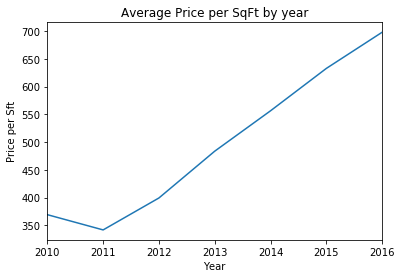

In [110]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

#Line chart for average sale price per square foot
axis_splot = average_sp_gr_peryear_df['sale_price_sqr_foot'].plot(title="Average Price per SqFt by year", kind='line')
axis_splot.set(ylabel="Price per Sft", xlabel="Year")

[Text(0, 0.5, 'Price per Sft'), Text(0.5, 0, 'Year')]

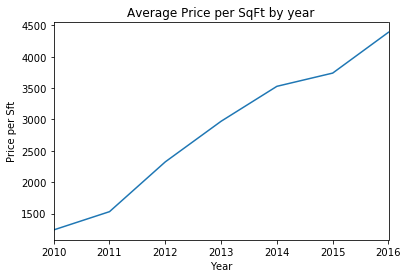

In [111]:
# Line chart for average montly rent
axis_splot2 = average_sp_gr_peryear_df['gross_rent'].plot(title="Average Price per SqFt by year", kind='line')
axis_splot2.set(ylabel="Price per Sft", xlabel="Year")

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [71]:
# Group by year and neighborhood and then create a new dataframe of the mean values
average_price_by_nhood_df = sfo_data.groupby(["year", "neighborhood"]).mean()
average_price_by_nhood_df.reset_index(inplace=True)
print(average_price_by_nhood_df.head(5))

   year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239


In [72]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
average_price_by_nhood_df.hvplot.line(label='Average Price per Square feet by year,', x='year', y='sale_price_sqr_foot', groupby='neighborhood', xlabel="Year", ylabel="Mean Price per Sft")


:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [73]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
average_price_by_nhood_df.hvplot.line(label='Average Price per Square feet by year,', x='year', y='gross_rent', groupby='neighborhood', xlabel="Year", ylabel="Average Monthly rent")

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [185]:
# Getting the data from the top 10 expensive neighborhoods to own
neighborhood_df = sfo_data.groupby(['neighborhood']).mean()
expensive_neighborhood = neighborhood_df.sort_values("sale_price_sqr_foot", ascending = False).head(10)
expensive_neighborhood.head(12)
expensive_neighborhood.reset_index(drop=False)



,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


[Text(0, 0.5, 'Average Price per Sft'), Text(0.5, 0, 'Neighborhood')]

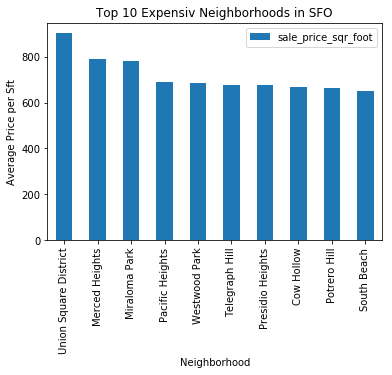

In [178]:
# Plotting the data from the top 10 expensive neighborhoods
axis_plot = expensive_neighborhood.plot.bar(y='sale_price_sqr_foot', title="Top 10 Expensive Neighborhoods in SFO")
axis_plot.set(ylabel="Average Price per Sft", xlabel="Neighborhood")

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [186]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
average_price_by_nhood_df = sfo_data.groupby(["year", "neighborhood"]).mean()
average_price_by_nhood_df.reset_index(inplace=True)
print(average_price_by_nhood_df.head(10))

   year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239
5  2010    Central Sunset           418.172493         372560        1239
6  2010    Corona Heights           369.359338         372560        1239
7  2010        Cow Hollow           569.379968         372560        1239
8  2010     Croker Amazon           165.645730         372560        1239
9  2010   Diamond Heights           456.930822         372560        1239


In [206]:

# Plotting the data from the top 10 expensive neighborhoods
result = pd.merge(expensive_neighborhood, average_price_by_nhood_df,how='inner', on=['neighborhood'])
result.columns
#print(result.head(5))

#def keep_rows_by_values(df, col, values):
#return df[df[col].isin(values) == True]
#filter_rows_by_values(average_price_by_nhood_df,"neighborhood", ["Union Square District","c"])
#expensive_neighborhood[['neighborhood']]
#print(expensive_neighborhood['neighborhood'])

#filter2 = data["Team"].isin(["Engineering", "Distribution", "Finance" ]

#average_price_by_nhood_df.loc[average_price_by_nhood_df["neighborhood"].isin(expensive_neighborhood["neighborhood"])]

#df.loc[df['column_name'].isin(some_values)]



plot1  = result.hvplot.bar(label='Top 10 Expensive Suburbs in SFO', x='year', y=['sale_price_sqr_foot_y','gross_rent_y'], groupby='neighborhood', xlabel="Neighborhood", ylabel="Housing Units")
plot1.opts(xrotation=90)
plot1

#plot2  = average_price_by_nhood_df.hvplot.bar(label='Gross Rent', x='year', y='gross_rent', groupby='neighborhood', xlabel="Gross Rent", ylabel="Housing Units")
#plot2

#crime.hvplot(x='Year', y=['Violent Crime rate', 'Robbery rate', 'Burglary rate'],value_label='Rate (per 100k people)')

#plot3 = plot1 + plot2
#plot3.opts()

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [33]:
# Load neighborhoods coordinates data
file_path = Path("./Data/neighborhoods_coordinates.csv")
neighborhood_locations_df = pd.read_csv(file_path)
neighborhood_locations_df.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [34]:
# Calculate the mean values for each neighborhood
sfo_data_mean_of_all_columns = sfo_data.groupby(["year"]).mean()
neighbourhood_meanvalues_df = sfo_data.groupby(["neighborhood"]).mean()
neighbourhood_meanvalues_df.reset_index(inplace=True)
neighbourhood_meanvalues_df.rename(columns={"neighborhood": "Neighborhood"}, inplace=True)
neighbourhood_meanvalues_df.head()

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [35]:
# Join the average values with the neighborhood locations
merged_neighbourhood_df = pd.merge(
    neighborhood_locations_df, neighbourhood_meanvalues_df, on="Neighborhood"
)
merged_neighbourhood_df.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [39]:
# Set the mapbox access token
# already done at the top

# Create a scatter mapbox to analyze neighborhood info
map = px.scatter_mapbox(
    merged_neighbourhood_df,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=11,
    hover_name="Neighborhood",
    title="Average values per neighbourhood Scatter Plot Visualisation",
)
map.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [207]:
# Fetch the data from all expensive neighborhoods per year.


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


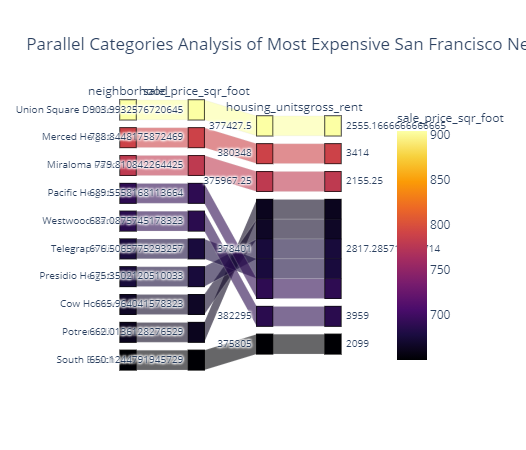

In [21]:
# Parallel Categories Plot
# YOUR CODE HERE!

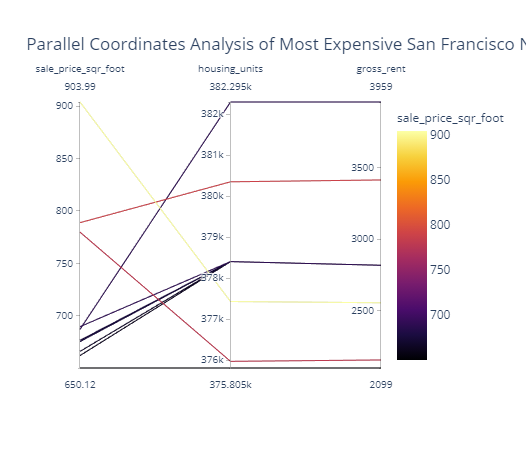

In [22]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

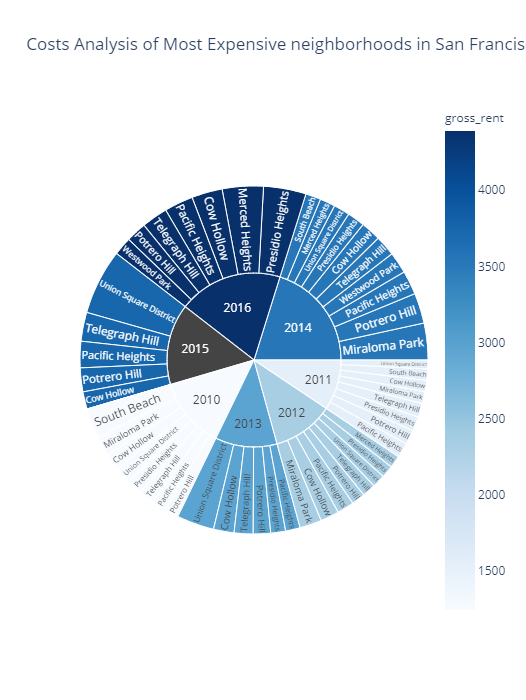

In [23]:
# Sunburst Plot
# YOUR CODE HERE!